# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Profissão Cientista de Dados M10 A1.csv.csv')
print(df.shape)
df.head()

(15000, 16)


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [7]:
df_num = df.select_dtypes('number')
df_num.head()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37


In [9]:
df_num.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [11]:
df_num.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [13]:
correlation_matrix = df_num.corr()
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


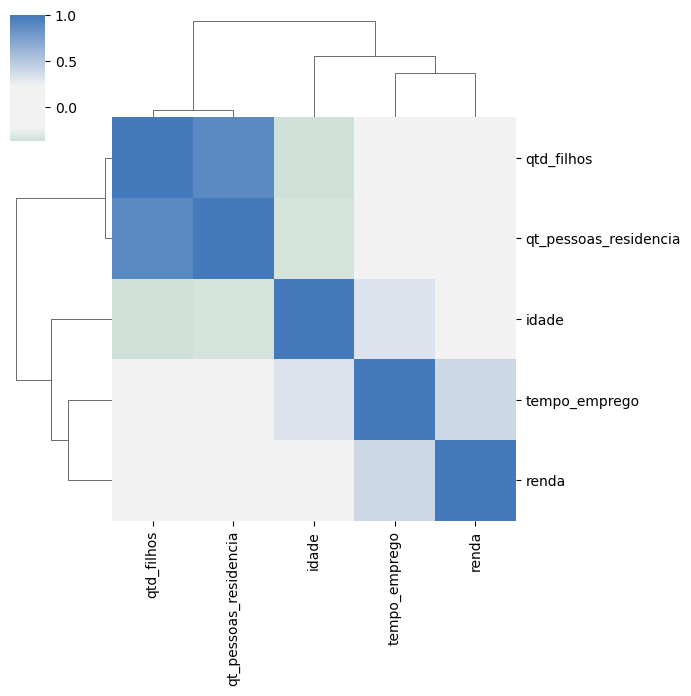

In [15]:
cmap = sns.diverging_palette(h_neg=150, h_pos=250, as_cmap=True, sep=60, center='light')
sns.clustermap(correlation_matrix, figsize=[7,7], center=0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [17]:
correlation_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


Text(0.5, 1.0, 'Tempo de emprego x Renda')

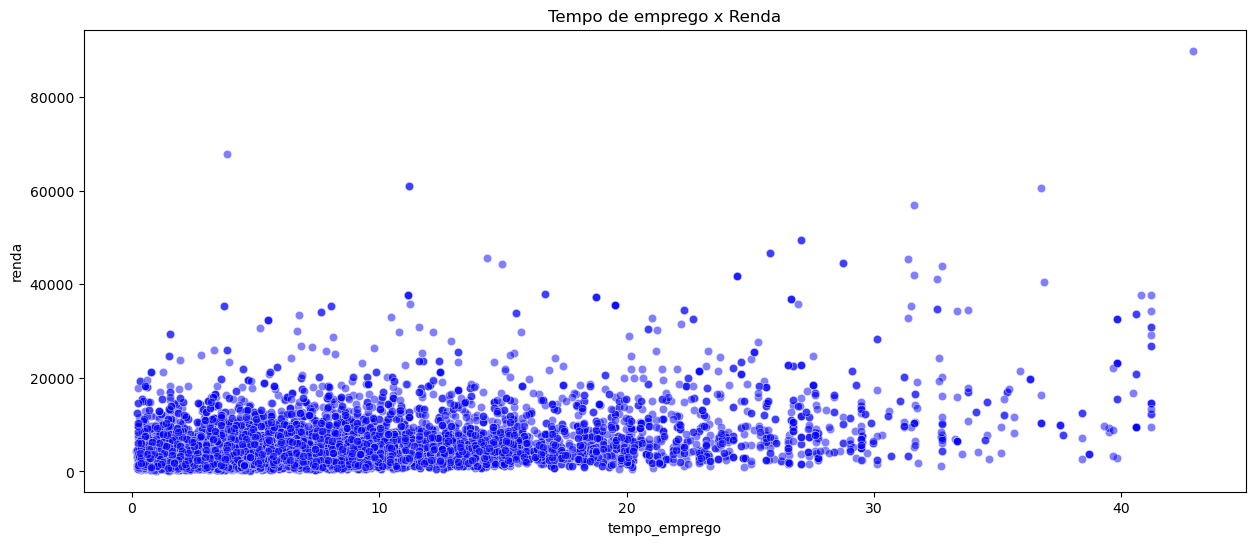

In [19]:
fig = plt.figure(figsize=[15,6])
sns.scatterplot(
    df_num, 
    x='tempo_emprego', 
    y='renda', 
    color='blue', 
    alpha=.5
)

plt.title('Tempo de emprego x Renda')

Text(0.5, 1.0, 'Idade x Renda')

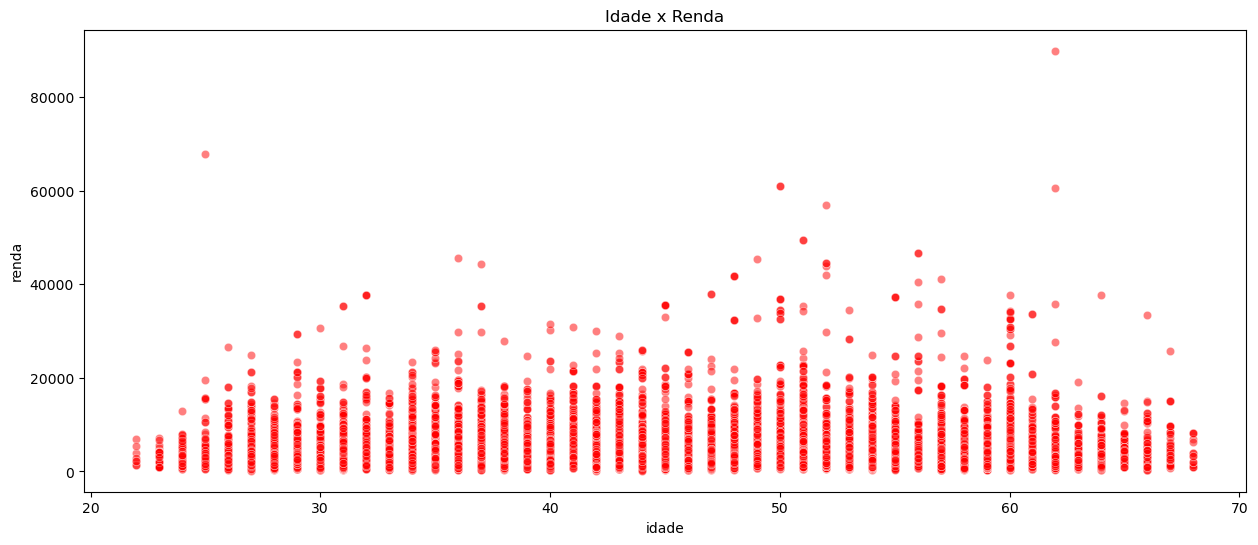

In [21]:
fig = plt.figure(figsize=[15,6])
sns.scatterplot(
    df_num, 
    x='idade', 
    y='renda',
    color='red',
    alpha=.5
)

plt.title('Idade x Renda')

Text(0.5, 1.0, 'Tempo de emprego x Renda')

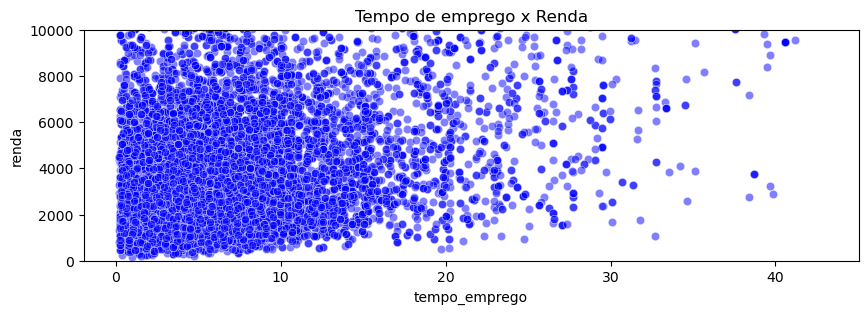

In [23]:
fig = plt.figure(figsize=[10,3])
figure = sns.scatterplot(
        df_num, 
        x='tempo_emprego', 
        y='renda', 
        color='blue', 
        alpha=.5
)

figure.set(ylim=(0, 10000))
plt.title('Tempo de emprego x Renda')

[(0.0, 15000.0)]

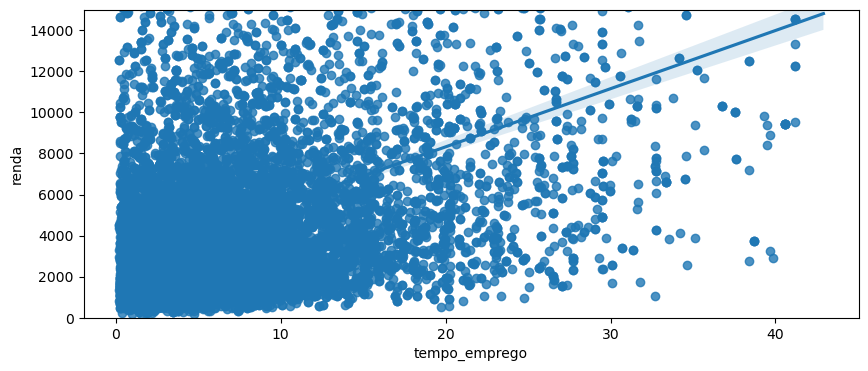

In [25]:
figure = plt.figure(figsize=[10, 4])

fig = sns.regplot(data=df_num, x='tempo_emprego', y='renda')
fig.set(ylim=[0, 15000])

3) Na su aopinião, há outliers na variável renda?

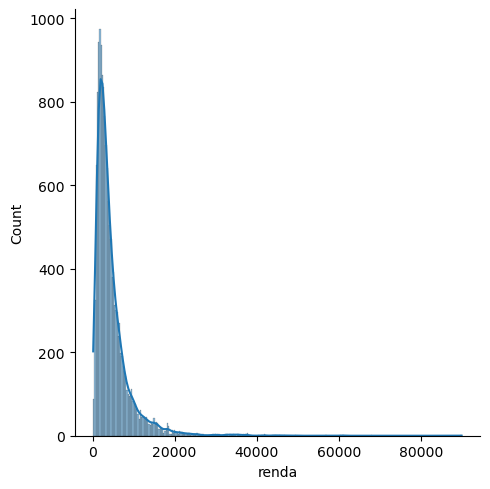

In [27]:
sns.displot(
    df_num, 
    x='renda',
    # bins=50,
    kde=True
)

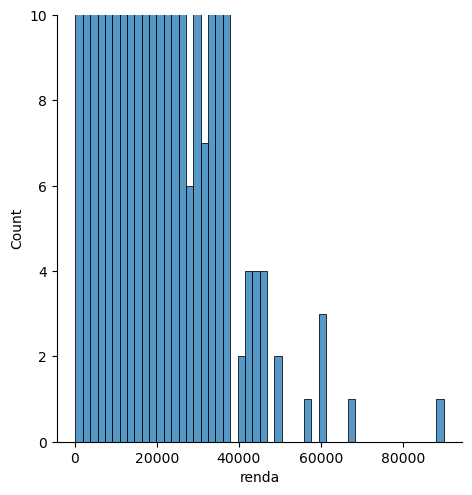

In [29]:
fig = sns.displot(
    df_num, 
    x='renda',
    bins=50,
    # kde=True
)

fig.set(ylim=(0, 10))

In [33]:
df_num[df_num['renda'] > 50000]

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
113,1,25,3.849315,3.0,67794.54
6772,0,52,31.621918,2.0,56938.90
7078,0,50,11.189041,2.0,60965.51
7765,0,62,36.753425,1.0,60475.59
9028,0,50,11.189041,2.0,60965.51
9934,0,62,42.906849,2.0,89918.04


In [ ]:
Após gerar alguns gráficos, é possível perceber que há alguns pontos que podem ser considerados como outliers, não necessariamente por terem sido digitados errado, mas sim por serem altos.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [37]:
df_log = df_num.copy()
df_log['renda_log'] = np.log(df_log['renda'])

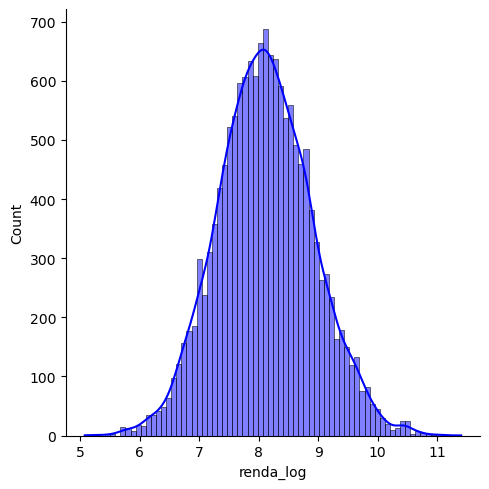

In [39]:
sns.displot(
    df_log,
    x='renda_log',
    kde=True,
    color='blue',
)

Text(0.5, 1.0, 'tempo_emprego x renda_log')

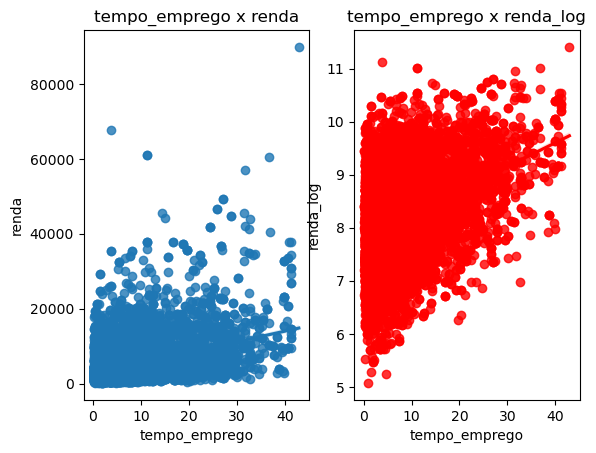

In [41]:
fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=(15,6))

ax1 = sns.regplot(ax=axes[0], data=df_log, x='tempo_emprego', y='renda')
ax1.set_title('tempo_emprego x renda')
ax2 = sns.regplot(ax=axes[1], data=df_log, x='tempo_emprego', y='renda_log', color='red')
ax2.set_title('tempo_emprego x renda_log')

Text(0.5, 1.0, 'idade x renda_log')

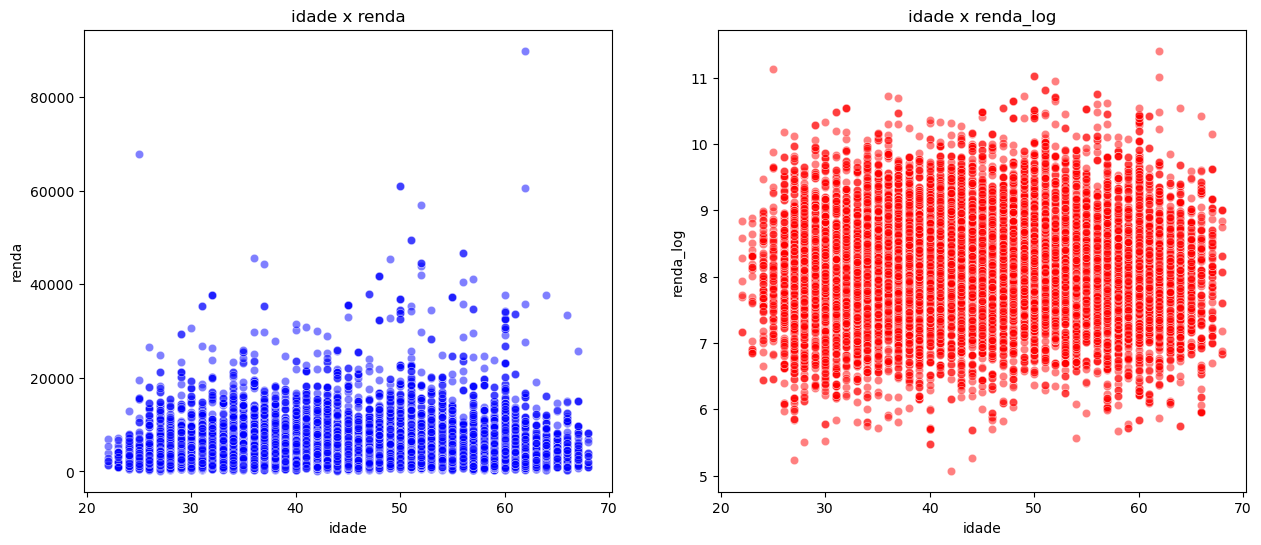

In [43]:
fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=(15,6))

ax1 = sns.scatterplot(ax = axes[0], x='idade', y='renda', data=df_log, alpha=.5, color='blue')
ax1.set_title('idade x renda')
ax2 = sns.scatterplot(ax = axes[1], x='idade', y='renda_log', data=df_log, alpha=.5, color='red')
ax2.set_title('idade x renda_log')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Uma vez que os valores de renda são fixos (montantes) e não são valores que se alteram ao longo do tempo, a aplicação do logaritmo não parece ser a melhor técnica. Seria mais eficiente para situações em que se tem o crescimento exponencial ao longo do tempo, como pode ser o caso de uma cultura de bactérias por exemplo, também pode ser utilizado quando se analisa a variação percentual de determinada quantidade, como a variação dos preços de ações ou títulos.